# Jarvis march algorithm

# Auxiliary Methods


In [1]:
#Returns a negative number if the pointOne is clockwise from the line formed from currentPoint and pointTwo
#Returns a positive number if the pointOne is counterclockwise from the line formed from currentPoint and pointTwo
#Returns 0 if all three points are colinear
def calculateCrossProduct(currentPoint, pointOne, pointTwo): 
    return (currentPoint[0] - pointOne[0]) * (currentPoint[1] - pointTwo[1]) - (currentPoint[0] - pointTwo[0]) * (currentPoint[1] - pointOne[1])

def distance(p1,p2):
    return ((p1[0]-p2[0])**2 + (p1[1] -p2[1])**2)**(1/2)


# Jarvis March Implementation 

In [2]:
def jarvisMarch(points):
    # select left most point
    startingPoint = min(points)
    current = startingPoint
    convexes = [startingPoint] 
    testPoint = points[0]
    while(True):
        for point in points:
            if(current == point):
                continue
            result = calculateCrossProduct(current, testPoint, point)
            if result > 0:
                testPoint = point
            elif result == 0:
                if(distance(current,testPoint) < distance(current, point)):
                    testPoint = point
        if testPoint == startingPoint:
            break
        current = testPoint
        convexes += [testPoint]
    return convexes

# Points Generation

In [3]:
import random


def genAveragePoints(inputSet, size):
    for i in range(size):
        x = [random.randint(0,32767), random.randint(0,32767)]
        while x in inputSet:
            x = [random.randint(0,32767), random.randint(0,32767)]
        inputSet.append(x)
    return inputSet


# worst case scenario point generation
# the worst case scenario would be where all the points generated are actually
# on the hull, so a circle
def genWorstPoints(inputSet, radius, centre):
    for x in range(-radius,radius+1,1):
        y1 = (radius**2 - x**2)**(0.5)
        inputSet.append([x+centre[0], y1+centre[1]])
        if(y1 == 0):
            continue
        y2 = -y1
        inputSet.append([x+centre[0], y2+centre[1]])
    return inputSet

# amount of points for testing
target_points = [100, 500, 1000, 5000, 10000, 15000, 20000]
random_amount = 5 # how many data sets of size x you want to generate


def generateListOfWorstPoints(target_points, random_amount):
    results = [[[] for _ in range(random_amount)] for _ in range(len(target_points))]
    for index, target_point in enumerate(target_points):
        radius = int(target_point / 4) #A circle with radius N has (N-1) * 2 points
        for i in range(0, 5):
            centre = [random.randint(radius,32767-radius), random.randint(radius,32767-radius)]       
            results[index][i] = genWorstPoints([], radius, centre)
    return results

def generateListOfAveragePoints(target_points, random_amount):
    results = [[[] for _ in range(random_amount)] for _ in range(len(target_points))]
    for index, target_point in enumerate(target_points):
        for i in range(0, 5):
            results[index][i] = genAveragePoints([], target_point)
    return results


worstPointsList = generateListOfWorstPoints(target_points, random_amount)

averagePointsList = generateListOfAveragePoints(target_points, random_amount)

# print(len(averagePointsList[1][0]))



# Driver Code for Testing

In [ ]:
import timeit

num_of_repeats = 1 # how many times to run the test (timeit runs)
num_of_test_per_repeat = 1 # how many times to run the test for timeit

def calcAverage(results, repeats):
    total = 0
    for result in results:
        total += result
    return total / random_amount


#test code
def performTestWithData(repeats,repeatsPerRun, random_amount, pointsList):
    for pointsGroup in pointsList:
        results = []
        for pointSet in pointsGroup:
            t = timeit.Timer(lambda: jarvisMarch(pointSet))
            results += t.repeat(repeats, repeatsPerRun)
        avg = calcAverage(results, repeats, repeatsPerRun, random_amount)
        
        print("Amount of points is " + str(len(pointSet)) + ", avg time per run is " + str(avg))



print("Average Tests\n")
performTestWithData(num_of_repeats,num_of_test_per_repeat,random_amount, averagePointsList)
print("\n")
print("Worst Tests\n")
performTestWithData(num_of_repeats,num_of_test_per_repeat, random_amount, worstPointsList)


Average Tests

Amount of points is 100, avg time per run is 0.0006289130076766014
Amount of points is 500, avg time per run is 0.0065488652035128325
Amount of points is 1000, avg time per run is 0.011077194602694362
Amount of points is 5000, avg time per run is 0.061194873409112914
Amount of points is 10000, avg time per run is 0.14770341019611805
Amount of points is 15000, avg time per run is 0.2308898473973386
Amount of points is 20000, avg time per run is 0.28715844119433315


Worst Tests

Amount of points is 100, avg time per run is 0.00585225680260919
Amount of points is 500, avg time per run is 0.13598102939431556
Amount of points is 1000, avg time per run is 0.5343195443972946


*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

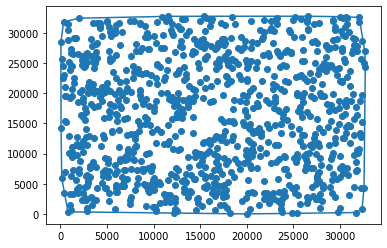

In [ ]:
import matplotlib.pyplot as plt

# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm

#inputSet = [[1,1], [2,2] , [3, 3], [4,4], [1,4], [3,1], [1, 5], [2, 4], [3, 5]]
#outputSet = [[1,1], [3,1] , [4, 4], [3,5], [1,5]]

inputSet = genAveragePoints([],1000)
outputSet = jarvisMarch(inputSet)

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys) 

plt.show() 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b41ac805-e808-4b29-bba5-591b97a0efec' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>